In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
E_artykuł = np.array([1.233701, 4.934802, 11.103305, 19.739209, 30.842514, 44.413220, 60.451327, 78.956835, 99.929745, 123.370055])
E_SM = np.array([1.235344, 4.941346, 11.094090, 19.741313, 30.835347, 44.399586, 60.434722, 78.939605, 99.891582, 123.336628])
E_SM_2_Gaussy = np.array([1.235344, 4.941346, 11.094090, 19.741313, 30.835345, 44.399586, 60.434722, 78.939605, 99.915551, 123.336634])
E_FD = np.array([1.232797, 4.931187, 11.095169, 19.724738, 30.819890, 44.380617, 60.406913, 78.898767, 99.856168, 123.279105])

In [3]:
roźnica_SM = np.ones(len(E_artykuł))
roźnica_SM_2_Gaussy = np.ones(len(E_artykuł))
roźnica_FD = np.ones(len(E_artykuł))
for i in range(len(E_artykuł)):
    roźnica_SM[i] = np.abs(E_artykuł[i] - E_SM[i])
    roźnica_SM_2_Gaussy[i] = np.abs(E_artykuł[i] - E_SM_2_Gaussy[i])
    roźnica_FD[i] = np.abs(E_artykuł[i] - E_FD[i])

energy_levels = np.linspace(0, len(roźnica_SM) - 1, len(roźnica_SM)) # wektor poziomów energetycznych od 0 do len(roźnica)

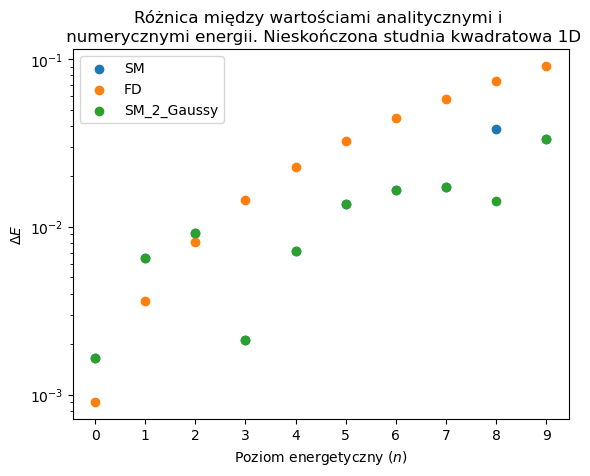

In [4]:
plt.scatter(energy_levels, roźnica_SM, label='SM')
plt.scatter(energy_levels, roźnica_FD, label='FD')
plt.scatter(energy_levels, roźnica_SM_2_Gaussy, label='SM_2_Gaussy')
plt.xlabel('Poziom energetyczny ($n$)')
plt.ylabel('$\Delta E$')
plt.title('Różnica między wartościami analitycznymi i \n numerycznymi energii. Nieskończona studnia kwadratowa 1D')
plt.yscale('log')
plt.xticks(np.arange(min(energy_levels), max(energy_levels) + 1, 1))  
plt.legend()
plt.savefig("Różnica energii Nieskończona Studnia Kwadratowa.pdf", bbox_inches='tight')  # dpi=300 - wysoka jakość
plt.show()

In [30]:
psi_E_An = np.load("funkcje psi(E) dla studni kwadratowej nieskończonej 1D Anal.npy")
psi_E_An /= np.linalg.norm(psi_E_An)

psi_E_SM = np.load("funkcje psi(E) dla studni kwadratowej nieskończonej 1D SM.npy")
psi_E_SM /= np.linalg.norm(psi_E_SM)

psi_E_SM_2_Gaussy = np.load("funkcje psi(E) dla studni kwadratowej nieskończonej 1D SM. Dwa Gaussy.npy")
psi_E_SM_2_Gaussy /= np.linalg.norm(psi_E_SM_2_Gaussy)

psi_E_FD = np.load("funkcje psi(E) dla studni kwadratowej nieskończonej 1D FD.npy")
psi_E_FD /= np.linalg.norm(psi_E_FD)

In [31]:
x_An = np.linspace(-5, 5, 1000)

N_SM = 2**7            # liczba punktów siatki - 1 w każdym kierunku
L_SM = 5           # długość boku obszaru
x_SM = np.linspace(-L_SM/2, L_SM/2, N_SM)

N_SM_2_Gaussy = 2**7            # liczba punktów siatki - 1 w każdym kierunku
L_SM_2_Gaussy = 5           # długość boku obszaru
x_SM_2_Gaussy = np.linspace(-L_SM_2_Gaussy/2, L_SM_2_Gaussy/2, N_SM_2_Gaussy)

N_FD = 2**13
x_max = 2.0
x_FD = np.linspace(-x_max, x_max, N_FD)

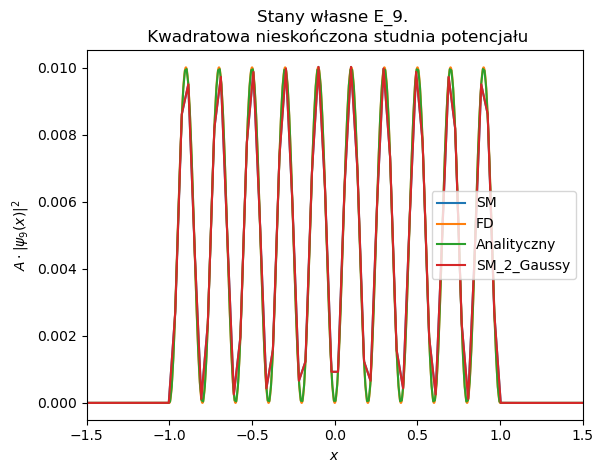

In [32]:

plt.plot(x_SM, 2.55*np.abs(psi_E_SM[9])**2, label='SM')
plt.plot(x_FD, 205.22*np.abs(psi_E_FD[:, 9])**2, label='FD')
plt.plot(x_An, 1*np.abs(psi_E_An)**2, label='Analityczny')
plt.plot(x_SM, 2.55*np.abs(psi_E_SM_2_Gaussy[9])**2, label='SM_2_Gaussy')
plt.xlim(-1.5, 1.5)
#plt.ylim(0, 0.002)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$A\cdot|\psi_9(x)|^2$')
plt.title('Stany własne E_9. \n Kwadratowa nieskończona studnia potencjału')
plt.savefig("Stany własne dla E_9. Kwadratowa nieskończona studnia potencjału.pdf", bbox_inches='tight')
plt.show()

In [26]:

from scipy.fft import fft, ifft, fftfreq

In [7]:

dt = 0.018         # krok czasowy
Nt = 2**15
T_max = Nt * dt       # maksymalny czas
t_values = np.arange(Nt) * dt

window = (1 - np.cos(2 * np.pi * t_values / T_max)) / T_max

In [9]:
# Stosujemy okno czasowe Hann jak wcześniej
psi_t_windowed = psi_t * window[:, np.newaxis]


In [11]:
np.save("funkcje psi(t)_windowed dla studni kwadratowej skończonej 1D.npy", psi_t_windowed)

In [3]:
psi_t_windowed = np.load("funkcje psi(t)_windowed dla studni kwadratowej skończonej 1D.npy")

In [6]:

psi_E = fft(psi_t_windowed, axis=0)  # shape: (Nt, Nx)


In [29]:
np.save("funkcje psi(t)_E dla studni kwadratowej skończonej 1D.npy", psi_E)

In [17]:
results = ([0.714035, 2.726324, 4.992207])

In [18]:
for r in results:
    print(r)

0.714035
2.726324
4.992207


In [21]:
eigen_psi = []

for r in results:
    # Znajduję najbliższy indeks na osi energii
    idx = np.argmin(np.abs(E + r))
    psi_n = psi_E[idx, :]  # Funkcja falowa dla En (do normowania)
    eigen_psi.append(psi_n)


In [23]:
eigen_psi_norm = [ψn / np.linalg.norm(ψn) for ψn in eigen_psi]

In [27]:

N = 2**14            # liczba punktów siatki - 1 w każdym kierunku
L = 1800           # długość boku obszaru
x = np.linspace(-L/2, L/2, N)

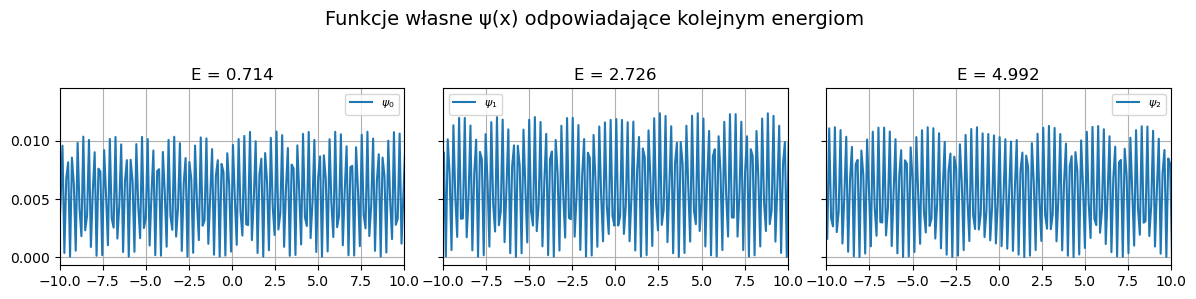

In [28]:
num_states = len(eigen_psi_norm)
cols = 3
rows = (num_states + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()

for i, ψn in enumerate(eigen_psi_norm):
    ax = axes[i]
    ax.plot(x, 100*np.abs(ψn)**2, label=r"$\psi_{%d}$" % i)
    ax.set_title(f"E = {(results[i]):.3f}")
    ax.grid(True)
    ax.legend(fontsize=8)
    ax.set_xlim(-10, 10)
    #ax.set_ylim(-145, -95)

# Jeśli są puste komórki, wyłącz je
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Funkcje własne ψ(x) odpowiadające kolejnym energiom", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
